In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [18]:
df = pd.read_excel("Natural_Science_Dataset (1).xlsx")
df.head(5)

,LOCATION,Country,POLLUTANT,Pollutant,MEASURE,Measure,FLIGHT,Flight type,FREQUENCY,Frequency,SOURCE,Source of emissions,SEASONALITY,Seasonality,TIME,Time,Value,Flag Codes,Flags
0,AUS,Australia,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,TOTAL,All flights,A,Annual,RES_DOM_IN,"""(A) - Domestic flight in country A, operated ...",NSA,Non seasonally adjusted,2015,2015,7.351698e+06,NaN,NaN
1,AUS,Australia,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,TOTAL,All flights,A,Annual,RES_DOM_IN,"""(A) - Domestic flight in country A, operated ...",NSA,Non seasonally adjusted,2016,2016,7.415273e+06,NaN,NaN
2,AUS,Australia,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,TOTAL,All flights,A,Annual,RES_DOM_IN,"""(A) - Domestic flight in country A, operated ...",NSA,Non seasonally adjusted,2017,2017,7.333902e+06,NaN,NaN
3,AUS,Australia,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,TOTAL,All flights,A,Annual,RES_DOM_IN,"""(A) - Domestic flight in country A, operated ...",NSA,Non seasonally adjusted,2018,2018,7.320473e+06,NaN,NaN
4,AUS,Australia,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,TOTAL,All flights,A,Annual,RES_DOM_IN,"""(A) - Domestic flight in country A, operated ...",NSA,Non seasonally adjusted,2019,2019,7.756780e+06,NaN,NaN


In [23]:
df = df[df["TIME"].apply(lambda x: isinstance(x, int))]
df["TIME"].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=object)

In [26]:
df = df[df["TIME"] != 2023]
df_global = df.groupby('TIME').agg({'Value': 'sum'}).reset_index()

In [48]:
df_global = df.groupby('TIME').agg({'Value': 'sum'}).reset_index()

Q1 = df_global['Value'].quantile(0.25)
Q3 = df_global['Value'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_global = df_global[(df_global['Value'] >= lower_bound) & (df_global['Value'] <= upper_bound)]

In [49]:
scaler = MinMaxScaler()
df_global['Normalized_Value'] = scaler.fit_transform(df_global[['Value']])

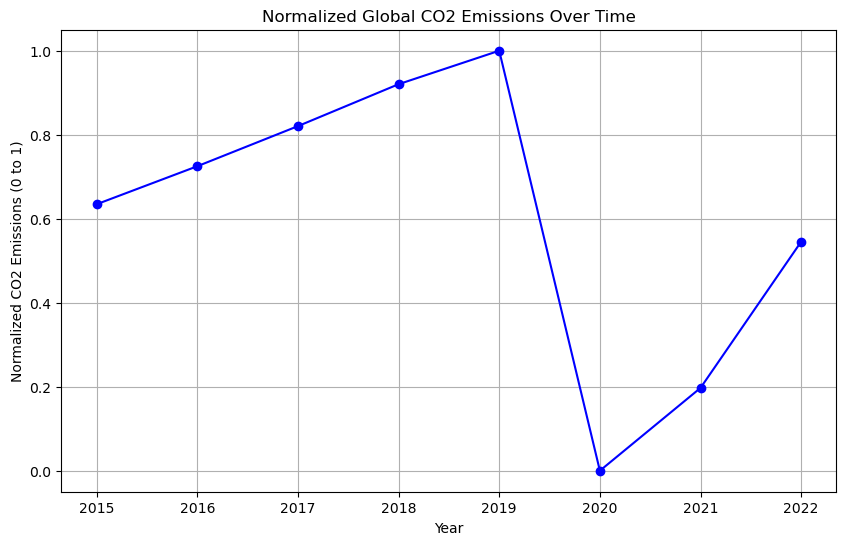

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(df_global['TIME'], df_global['Normalized_Value'], marker='o', linestyle='-', color='b')
plt.title('Normalized Global CO2 Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Normalized CO2 Emissions (0 to 1)')
plt.grid(True)
plt.show()

In [52]:
df_before_2020 = df_global[df_global['TIME'] < 2020]
df_after_2020 = df_global[df_global['TIME'] >= 2020]

X_before_2020 = df_before_2020['TIME'].values.reshape(-1, 1)
y_before_2020 = df_before_2020['Value'].values

X_after_2020 = df_after_2020['TIME'].values.reshape(-1, 1)
y_after_2020 = df_after_2020['Value'].values

In [53]:
model_before_2020 = LinearRegression()
model_before_2020.fit(X_before_2020, y_before_2020)

model_after_2020 = LinearRegression()
model_after_2020.fit(X_after_2020, y_after_2020)

y_pred_before_2020 = model_before_2020.predict(X_before_2020)
y_pred_after_2020 = model_after_2020.predict(X_after_2020)

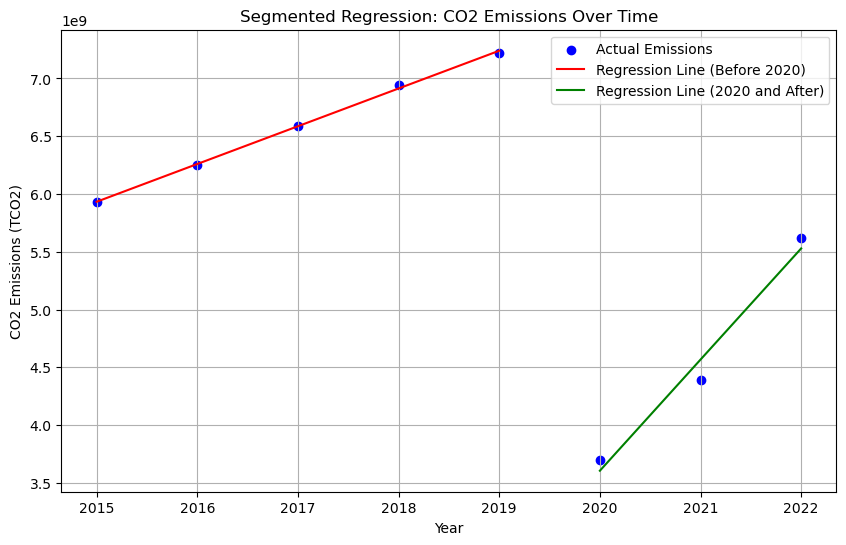

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(df_global['TIME'], df_global['Value'], color='blue', label='Actual Emissions')
plt.plot(df_before_2020['TIME'], y_pred_before_2020, color='red', label='Regression Line (Before 2020)')
plt.plot(df_after_2020['TIME'], y_pred_after_2020, color='green', label='Regression Line (2020 and After)')
plt.title('Segmented Regression: CO2 Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (TCO2)')
plt.grid(True)
plt.legend()
plt.show()

In [55]:
future_years = np.array([2023, 2024, 2025, 2026, 2027]).reshape(-1, 1)
future_predictions = model_after_2020.predict(future_years)
df_future = pd.DataFrame({'TIME': future_years.flatten(), 'Predicted_Value': future_predictions})

In [58]:
current_year = df_global['TIME'].max()
current_emission_level = df_global['Value'].iloc[-1]

In [59]:
target_2030 = current_emission_level * 0.5
target_2050 = 0
years_target = np.arange(2023, 2051)  

In [67]:
emission_path_to_2030 = np.linspace(current_emission_level, target_2030, 2030 - current_year + 1)
emission_path_to_2050 = np.linspace(target_2030, target_2050, 2050 - 2030)

emission_reduction_path = np.concatenate([emission_path_to_2030, emission_path_to_2050[1:]])

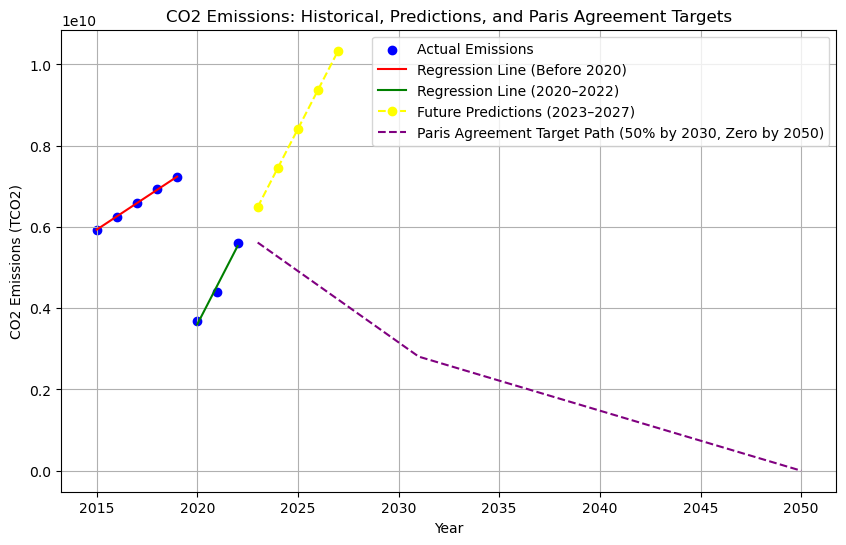

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(df_global['TIME'], df_global['Value'], color='blue', label='Actual Emissions')
plt.plot(df_before_2020['TIME'], y_pred_before_2020, color='red', label='Regression Line (Before 2020)')
plt.plot(df_after_2020['TIME'], y_pred_after_2020, color='green', label='Regression Line (2020–2022)', linestyle='-')
plt.plot(future_years, future_predictions, color='yellow', label='Future Predictions (2023–2027)', linestyle='--', marker='o')
plt.plot(years_target, emission_reduction_path, color='purple', label='Paris Agreement Target Path (50% by 2030, Zero by 2050)', linestyle='--')
plt.title('CO2 Emissions: Historical, Predictions, and Paris Agreement Targets')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (TCO2)')
plt.grid(True)
plt.legend()
plt.show()


In [57]:
print("Future CO2 Emissions Predictions (2023–2027):")
for year, prediction in zip(future_years.flatten(), future_predictions):
    print(f"Year {year}: Predicted CO2 Emissions = {prediction}")

Future CO2 Emissions Predictions (2023–2027):
Year 2023: Predicted CO2 Emissions = 6490698876.687012
Year 2024: Predicted CO2 Emissions = 7452737816.734375
Year 2025: Predicted CO2 Emissions = 8414776756.781738
Year 2026: Predicted CO2 Emissions = 9376815696.828857
Year 2027: Predicted CO2 Emissions = 10338854636.87622


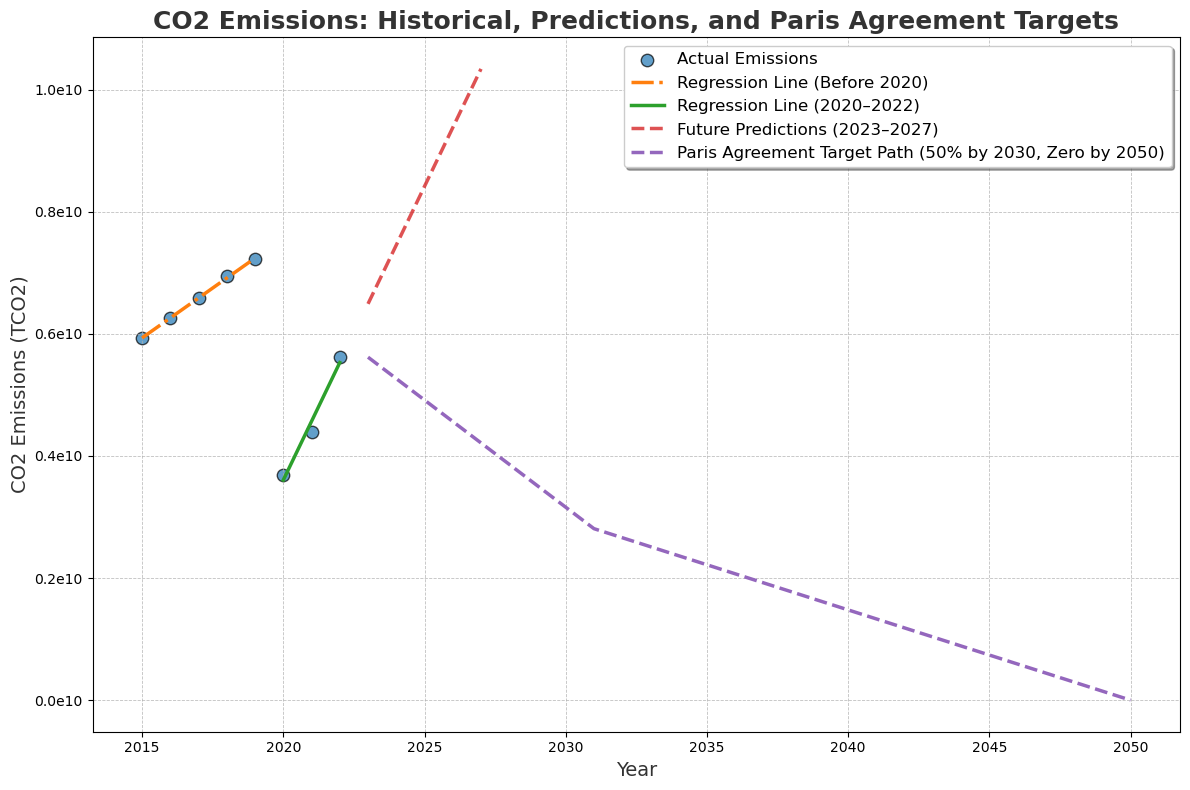

In [73]:
import matplotlib.ticker as mtick

plt.figure(figsize=(12, 8))

# Scatter plot for actual emissions
plt.scatter(df_global['TIME'], df_global['Value'], color='#1f77b4', label='Actual Emissions', s=80, edgecolor='black', alpha=0.7)

# Regression line (Before 2020)
plt.plot(df_before_2020['TIME'], y_pred_before_2020, color='#ff7f0e', label='Regression Line (Before 2020)', linewidth=2.5, linestyle='-.')

# Regression line (2020-2022)
plt.plot(df_after_2020['TIME'], y_pred_after_2020, color='#2ca02c', label='Regression Line (2020–2022)', linewidth=2.5, linestyle='-')

# Future predictions (2023-2027)
plt.plot(future_years, future_predictions, color='#d62728', label='Future Predictions (2023–2027)', linestyle='--', linewidth=2.5, alpha=0.8)

# Paris Agreement target path (50% by 2030, Zero by 2050)
plt.plot(years_target, emission_reduction_path, color='#9467bd', label='Paris Agreement Target Path (50% by 2030, Zero by 2050)', linestyle='--', linewidth=2.5)

plt.title('CO2 Emissions: Historical, Predictions, and Paris Agreement Targets', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Year', fontsize=14, color='#333333')
plt.ylabel('CO2 Emissions (TCO2)', fontsize=14, color='#333333')

# Format y-axis to use scientific notation with the correct multiplier
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x*1e-10:.1f}e10'))

plt.grid(True, which='both', linestyle='--', linewidth=0.6, alpha=0.8)
plt.legend(fontsize=12, loc='upper right', frameon=True, shadow=True, fancybox=True)
plt.tight_layout()

plt.show()